In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
# para el entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = sns.load_dataset('titanic')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
data = data[['survived', 'sex', 'age', 'fare', 'class', 'embark_town', 'alone']]
data.head(10)

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.0,7.2500,Third,Southampton,False
1,1,female,38.0,71.2833,First,Cherbourg,False
2,1,female,26.0,7.9250,Third,Southampton,True
3,1,female,35.0,53.1000,First,Southampton,False
4,0,male,35.0,8.0500,Third,Southampton,True
5,0,male,NaN,8.4583,Third,Queenstown,True
6,0,male,54.0,51.8625,First,Southampton,True
7,0,male,2.0,21.0750,Third,Southampton,False
8,1,female,27.0,11.1333,Third,Southampton,False
9,1,female,14.0,30.0708,Second,Cherbourg,False


In [4]:
promedio  = data['age'].mean()
print(promedio)
data['age'].fillna(promedio, inplace = True)
data.head(10)

29.69911764705882


,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.000000,7.2500,Third,Southampton,False
1,1,female,38.000000,71.2833,First,Cherbourg,False
2,1,female,26.000000,7.9250,Third,Southampton,True
3,1,female,35.000000,53.1000,First,Southampton,False
4,0,male,35.000000,8.0500,Third,Southampton,True
5,0,male,29.699118,8.4583,Third,Queenstown,True
6,0,male,54.000000,51.8625,First,Southampton,True
7,0,male,2.000000,21.0750,Third,Southampton,False
8,1,female,27.000000,11.1333,Third,Southampton,False
9,1,female,14.000000,30.0708,Second,Cherbourg,False


In [5]:
data[['age', 'fare']].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


## HISTOGRAMAS

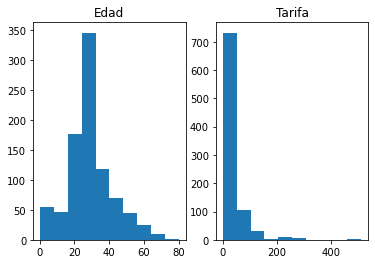

In [6]:
fig, axs = plt.subplots(1,2)
axs[0].hist(data['age'])
axs[0].set_title('Edad')
axs[1].hist(data['fare'])
axs[1].set_title('Tarifa');

In [7]:
data.groupby('survived').size()

survived
0    549
1    342
dtype: int64

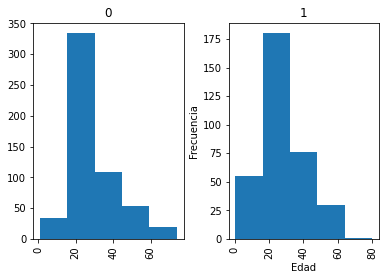

In [8]:
# siendo 0 los muertos
# siendo 1 los sobrevivientes
# Histograma de la distribución de sobrevivientes por edad en 5 intervalos
data.hist(column='age', by='survived', bins=5)
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show();

## COMENTARIO

### las personas de 0 a 20 sobrevivieron porque eran niños, tambien los de 20-30 tuvieron un indice mas alto de muertes porque eran hombres, y de 40-80 tambien sobrevivieron porque le dieron mas prioridad

In [9]:
train, test = train_test_split(data, test_size = 0.3, stratify = data['survived'], random_state=29)
train.head(5)

,survived,sex,age,fare,class,embark_town,alone
135,0,male,23.0,15.0458,Second,Cherbourg,True
273,0,male,37.0,29.7000,First,Cherbourg,False
729,0,female,25.0,7.9250,Third,Southampton,False
441,0,male,20.0,9.5000,Third,Southampton,True
321,0,male,27.0,7.8958,Third,Southampton,True


In [10]:
#complementos para entrenar
x_train = train.drop('survived', axis= 1)
y_train = train['survived']

x_train = pd.get_dummies(x_train, columns=['sex'])
x_train = pd.get_dummies(x_train, columns=['class'])
x_train = pd.get_dummies(x_train, columns=['embark_town'])
x_train = pd.get_dummies(x_train, columns=['alone'])

In [11]:
# Creacion del modelo del arbo de decision
arbol = DecisionTreeClassifier(max_depth=5, random_state=1)
arbol.fit(x_train,y_train)
prediccion = arbol.predict(x_train)

In [12]:
# Modulos para metricas de eficiencia del modelo 
from sklearn import metrics

In [13]:
# Verificacion de la precision del arbol
print('La precision del arbol de decision es: {:.3f}'.format(metrics.accuracy_score(prediccion, y_train)))

La precision del arbol de decision es: 0.843


In [14]:
arbol.feature_importances_

array([0.11015312, 0.13351259, 0.        , 0.54981147, 0.043926  ,
       0.00637318, 0.1366406 , 0.        , 0.00938596, 0.        ,
       0.        , 0.01019709])

In [15]:
arbol.feature_names_in_

array(['age', 'fare', 'sex_female', 'sex_male', 'class_First',
       'class_Second', 'class_Third', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'alone_False',
       'alone_True'], dtype=object)

In [16]:
importancia_dt=pd.DataFrame({'Caracteristica':arbol.feature_names_in_,
                            'Importancia':arbol.feature_importances_})
importancia_dt

,Caracteristica,Importancia
0,age,0.110153
1,fare,0.133513
2,sex_female,0.000000
3,sex_male,0.549811
4,class_First,0.043926
5,class_Second,0.006373
6,class_Third,0.136641
7,embark_town_Cherbourg,0.000000
8,embark_town_Queenstown,0.009386
9,embark_town_Southampton,0.000000


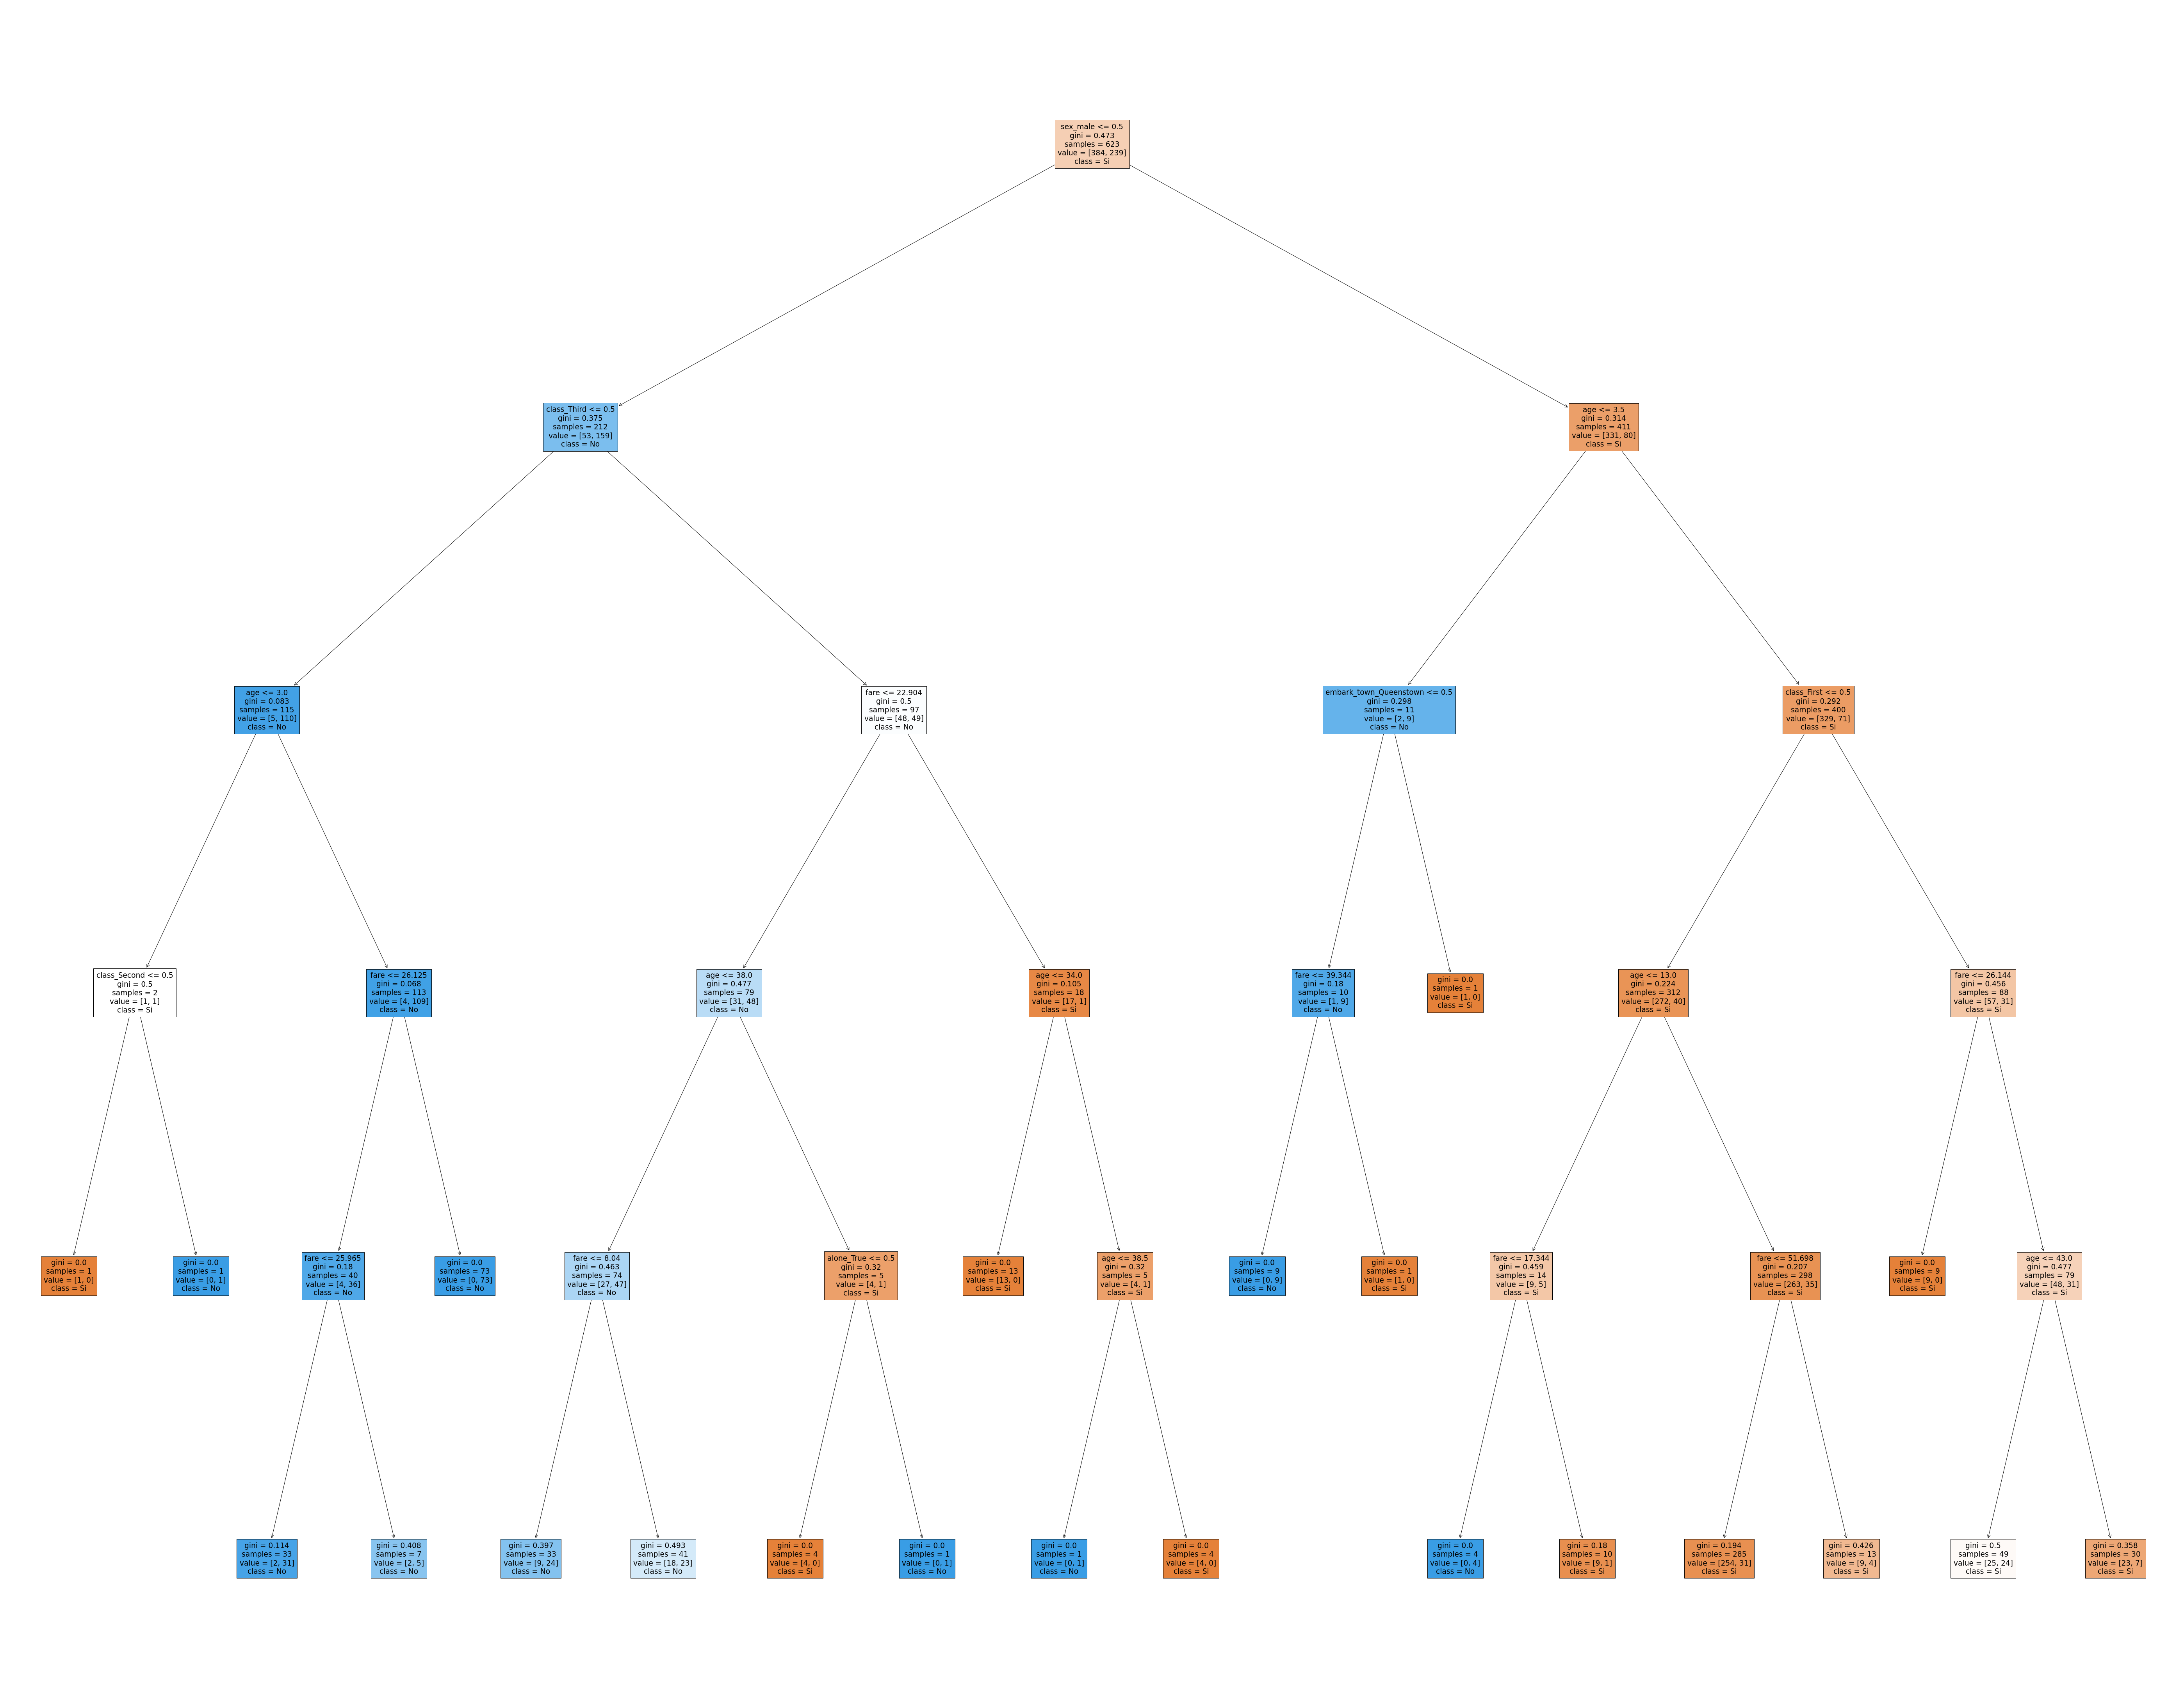

In [18]:
plt.figure(figsize=(100,80))
plot_tree(arbol, feature_names=arbol.feature_names_in_, class_names=['Si', 'No'], filled=True);